DR directory exists: True
No DR directory exists: True
Found 749 validated image filenames belonging to 2 classes.
Found 187 validated image filenames belonging to 2 classes.


c:\Users\ganga\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 32 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
c:\Users\ganga\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 32 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
c:\Users\ganga\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ganga\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `worker

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8229 - loss: 0.3149 - val_accuracy: 1.0000 - val_loss: 1.2171e-08
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 655ms/step - accuracy: 1.0000 - loss: 8.5665e-06 - val_accuracy: 1.0000 - val_loss: 1.1028e-14
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 671ms/step - accuracy: 1.0000 - loss: 1.1825e-07 - val_accuracy: 1.0000 - val_loss: 2.9482e-15
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 813ms/step - accuracy: 1.0000 - loss: 7.0454e-09 - val_accuracy: 1.0000 - val_loss: 2.5562e-15
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 761ms/step - accuracy: 1.0000 - loss: 6.3157e-09 - val_accuracy: 1.0000 - val_loss: 2.5787e-15
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 769ms/step - accuracy: 1.0000 - loss: 1.1887e-07 - val_accuracy: 1.0000 - val_loss: 2.4518e-15
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 754ms/step - accuracy: 1.0000 - loss: 6.3357e-09 - val_accuracy: 1.0000 - val_loss: 2.4750e-15
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 760ms/

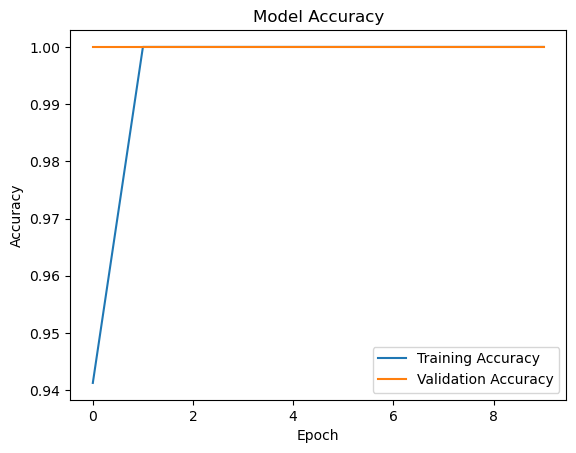

In [2]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

# Dataset location
data_dir = r"E:\Diabetic_retinopathy\Diabetic_Retinopathy"
dr_dir = os.path.join(data_dir, "DR")  # Updated path: Removed 'train'
no_dr_dir = os.path.join(data_dir, "no_dr")  # Updated path: Removed 'train'

# Verify directories exist
print("DR directory exists:", os.path.exists(dr_dir))
print("No DR directory exists:", os.path.exists(no_dr_dir))

# Create DataFrame for binary classification
df = pd.DataFrame({
    "image_path": [os.path.join(dr_dir, f) for f in os.listdir(dr_dir)] +
                  [os.path.join(no_dr_dir, f) for f in os.listdir(no_dr_dir)],
    "label": ["DR"] * len(os.listdir(dr_dir)) + ["No_DR"] * len(os.listdir(no_dr_dir))
})

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    df,
    x_col="image_path",
    y_col="label",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

validation_generator = train_datagen.flow_from_dataframe(
    df,
    x_col="image_path",
    y_col="label",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Save the model
model.save("binary_dr_cnn.keras")

# Plot training history
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Prediction function
def predict_class(image_path, model_path="binary_dr_cnn.keras"):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Unable to load image.")
        return
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224, 224))
    
    plt.imshow(img_resized)
    plt.axis("off")
    plt.show()
    
    img_array = np.array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    model = tf.keras.models.load_model(model_path)
    prediction = model.predict(img_array)
    predicted_class = "DR" if prediction[0] > 0.5 else "No_DR"
    
    print(f"Prediction: {predicted_class}")

# Test predictions (replace with actual image paths)
img_path_dr = r"E:\Diabetic_retinopathy\Diabetic_Retinopathy\DR\0a3202889f4d.png"
img_path_no_dr = r"E:\Diabetic_retinopathy\Diabetic_Retinopathy\no_dr\19-EYE-4245-Non-Proliferative-Diabetic-Retinopathy-CQD_jpg - Copy (3).webp"

print("Prediction for DR image:")
predict_class(img_path_dr)

print("\nPrediction for No_DR image:")
predict_class(img_path_no_dr)

Prediction for DR image:
Error: Unable to load image.

Prediction for No_DR image:
Error: Unable to load image.
